ЛР3 Меры связи случайных величин. Интервальные оценки параметров

Статистика количества часов, потраченных студентом на учебу, и полученные им оценки
https://www.kaggle.com/datasets/himanshunakrani/student-study-hours

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/My Drive/scores.csv')
hours = data['Hours']
scores = data['Scores']
data


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
...,...,...
91,5.8,60
92,4.4,44
93,6.1,63
94,3.7,37


Коэффициент корреляции: 0.99
Коэффициент детерминации (R^2): 0.98


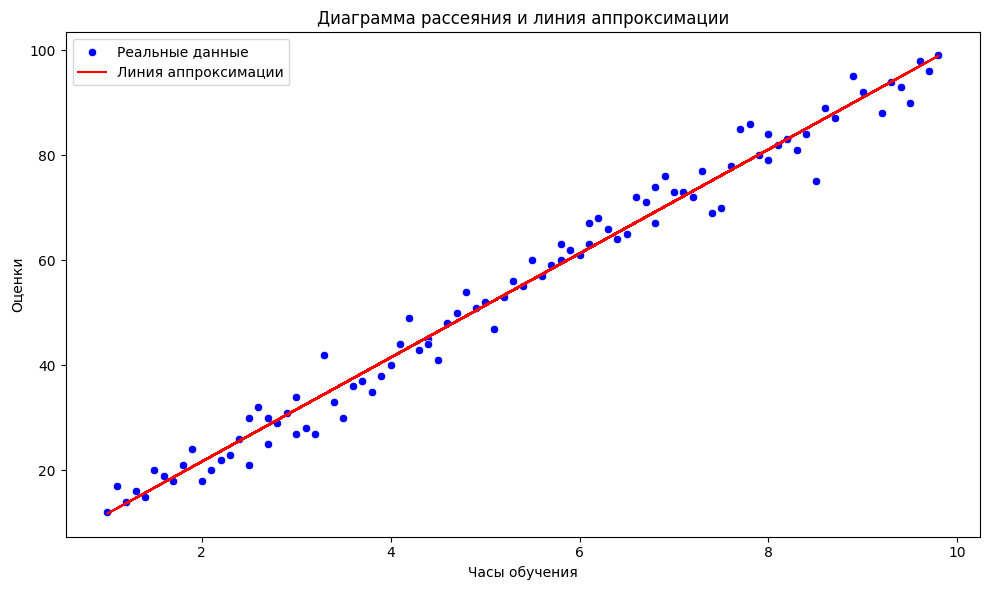

In [23]:
correlation = np.corrcoef(hours, scores)[0, 1]
print(f"Коэффициент корреляции: {correlation:.2f}")
X = hours.values.reshape(-1, 1)
y = scores.values
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
print(f"Коэффициент детерминации (R^2): {r2:.2f}")
plt.figure(figsize=(10, 6))
sns.scatterplot(x=hours, y=scores, color='blue', label='Реальные данные')
plt.plot(hours, y_pred, color='red', label='Линия аппроксимации')
plt.title('Диаграмма рассеяния и линия аппроксимации')
plt.xlabel('Часы обучения')
plt.ylabel('Оценки')
plt.legend()
plt.tight_layout()
plt.show()


Коэффициент корреляции равный 0.99 указывает на сильную положительную зависимость между двумя переменными

Коэффициент детерминации равный 0.98 говорит нам о том, что модель идеально предсказывает зависимости наших данных

In [22]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)


general_data = data.copy()
print(f"Размер генеральной выборки: {len(general_data)}")
random_sample = general_data.sample(frac=1/3, random_state=42)
print(f"Размер случайной выборки: {len(random_sample)}")
bins = [0, 2.5, 5, 10]
labels = ['Мало', 'Средне', 'Много']
general_data['Category'] = pd.cut(general_data['Hours'], bins=bins, labels=labels)
stratified_sample = general_data.groupby('Category', group_keys=False).apply(
    lambda x: x.sample(frac=1/3, random_state=42)
).reset_index(drop=True)
print(f"Размер стратифицированной выборки: {len(stratified_sample)}")
print(stratified_sample['Category'].value_counts())


Размер генеральной выборки: 96
Размер случайной выборки: 32
Размер стратифицированной выборки: 33
Category
Много     17
Средне    10
Мало       6
Name: count, dtype: int64


In [26]:
from scipy.stats import t

general_mean = general_data['Scores'].mean()
random_sample_mean = random_sample['Scores'].mean()
stratified_sample_mean = stratified_sample['Scores'].mean()
print(f"Среднее значение генеральной совокупности: {general_mean:.2f}")
print(f"Среднее значение случайной выборки: {random_sample_mean:.2f}")
print(f"Среднее значение стратифицированной выборки: {stratified_sample_mean:.2f}")

def confidence_interval(data, confidence=0.95):
    n = len(data)
    mean = data.mean()
    std_err = data.std(ddof=1) / (n ** 0.5)
    h = std_err * t.ppf((1 + confidence) / 2, df=n-1)
    return mean - h, mean + h

confidence_levels = [0.90, 0.95, 0.99]
for conf in confidence_levels:
    ci_random = confidence_interval(random_sample['Scores'], confidence=conf)
    ci_stratified = confidence_interval(stratified_sample['Scores'], confidence=conf)
    print(f"Доверительный интервал {conf*100:.0f}%:")
    print(f"  Случайная выборка: {ci_random[0]:.2f} - {ci_random[1]:.2f}")
    print(f"  Стратифицированная выборка: {ci_stratified[0]:.2f} - {ci_stratified[1]:.2f}")

print("\nСравнение средних значений:")
print(f"Среднее генеральной совокупности: {general_mean:.2f}")
print(f"Границы доверительных интервалов случайной выборки: {ci_random[0]:.2f} - {ci_random[1]:.2f}")
print(f"Границы доверительных интервалов стратифицированной выборки: {ci_stratified[0]:.2f} - {ci_stratified[1]:.2f}")


Среднее значение генеральной совокупности: 54.02
Среднее значение случайной выборки: 54.31
Среднее значение стратифицированной выборки: 52.55
Доверительный интервал 90%:
  Случайная выборка: 46.63 - 61.99
  Стратифицированная выборка: 45.52 - 59.57
Доверительный интервал 95%:
  Случайная выборка: 45.07 - 63.55
  Стратифицированная выборка: 44.09 - 61.00
Доверительный интервал 99%:
  Случайная выборка: 41.88 - 66.74
  Стратифицированная выборка: 41.18 - 63.91

Сравнение средних значений:
Среднее генеральной совокупности: 54.02
Границы доверительных интервалов случайной выборки: 41.88 - 66.74
Границы доверительных интервалов стратифицированной выборки: 41.18 - 63.91
